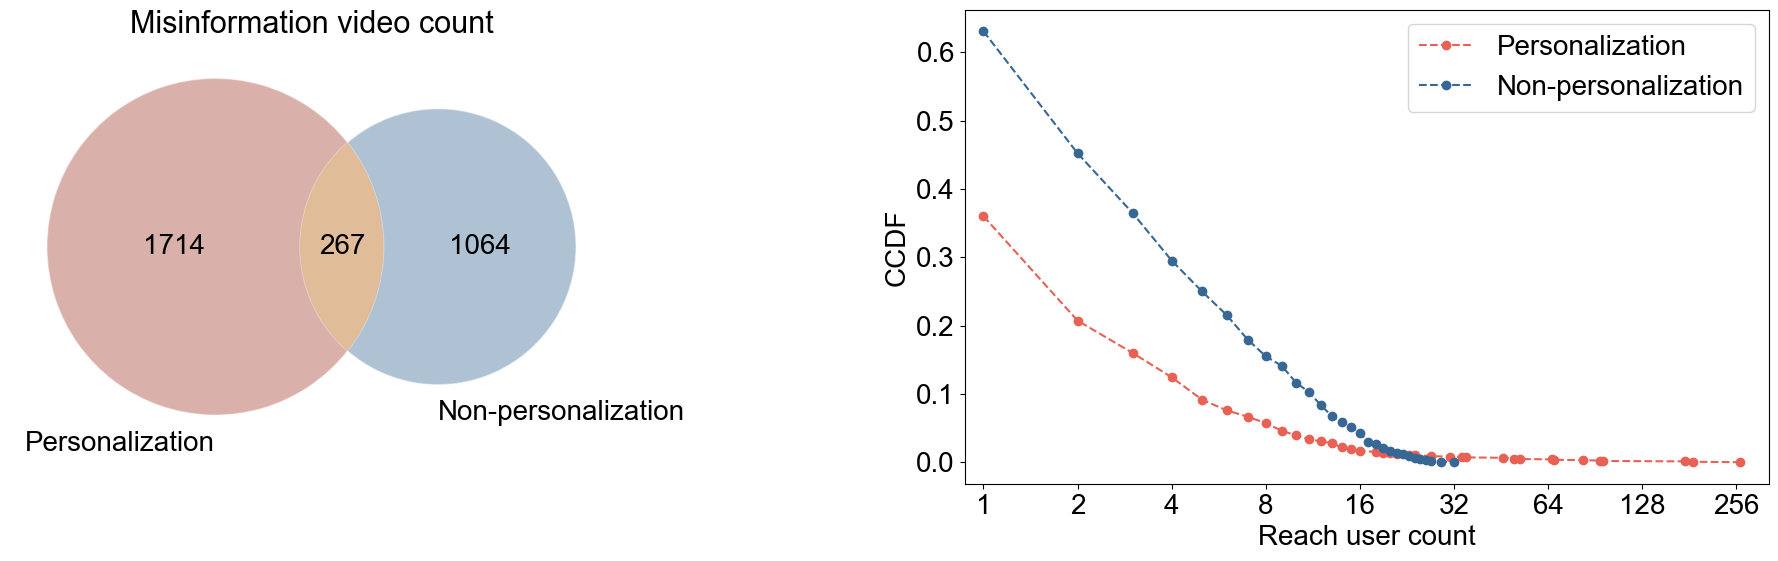

In [8]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

def get_ccdf_log(value_df, target):
    value_counts = value_df[target].value_counts()
    value_counts_df = pd.DataFrame({target: value_counts.index, 'count': value_counts.values})
    value_counts_df = value_counts_df.sort_values(by=target, ascending=True)
    total_count = value_counts_df['count'].sum()
    value_counts_df['count'] = value_counts_df['count'] / total_count
    ccdf = list(1 - value_counts_df['count'].cumsum())
    return np.log2(value_counts_df[target]), ccdf[:]  

match_group = 'A'
page = 'find'

# read data
personal_intercation = pd.read_csv(f'../data/personal_{page}_misinformation_play_ratio_group{match_group}.csv')
no_personal_intercation = pd.read_csv(f'../data/no_personal_{page}_misinformation_play_ratio_group{match_group}.csv')

personal_interaction = personal_intercation[personal_intercation['show_cnt']!=0].copy()
no_personal_interaction = no_personal_intercation[no_personal_intercation['show_cnt']!=0].copy()


# plot
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
font_size = 20

personal_intercation_value_df = personal_interaction.groupby('photo_id')['device_id'].nunique().reset_index()
no_personal_intercation_value_df = no_personal_interaction.groupby('photo_id')['device_id'].nunique().reset_index()

fig = plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[6, 8]) 
axes = [plt.subplot(gs[0]), plt.subplot(gs[1])]

# Fig. 3B
x, y = get_ccdf_log(personal_intercation_value_df, 'device_id')
axes[1].plot(x, y, color='#e76254', linestyle='--', label='Personalization', marker = 'o')

x, y = get_ccdf_log(no_personal_intercation_value_df, 'device_id')
axes[1].plot(x, y, color='#376795', linestyle='--', label='Non-personalization', marker = 'o')


axes[1].legend(fontsize = font_size)
axes[1].set_ylabel('CCDF', fontsize = font_size)
axes[1].set_xlabel('Reach user count', fontsize = font_size) 
axes[1].set_xlim((-0.2,np.log(256)+2.8))
axes[1].set_xticks([i for i in range(9)], [2**i for i in range(9)])
axes[1].tick_params(labelsize=font_size) 

# Fig. 3A
personal_photo_ids = set(personal_interaction['photo_id'])
no_personal_photo_ids = set(no_personal_interaction['photo_id'])

personal_photo_ids = set(personal_interaction['photo_id'])
no_personal_photo_ids = set(no_personal_interaction['photo_id'])
common_photo_ids = personal_photo_ids.intersection(no_personal_photo_ids)

num_personal_photo_ids = len(personal_photo_ids)
num_no_personal_photo_ids = len(no_personal_photo_ids)
num_common_photo_ids = len(common_photo_ids)

venn = venn2(subsets=(num_personal_photo_ids, num_no_personal_photo_ids, num_common_photo_ids),
             set_labels=('Personalization', 'Non-personalization'), ax=axes[0])
venn.get_patch_by_id('10').set_color('#a43b2c')  
venn.get_patch_by_id('01').set_color('#376795')   
venn.get_patch_by_id('10').set_edgecolor('white') 
venn.get_patch_by_id('01').set_edgecolor('white')  

axes[0].set_title('Misinformation video count', size = font_size+2)
for text in venn.set_labels:
    text.set_fontsize(20)

for text in venn.subset_labels:
    text.set_fontsize(20)

plt.subplots_adjust(left=0, bottom=0.11, right=0.977, top=0.9, wspace=0.5, hspace=None)
plt.show()